In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create a tensor
array_5d = np.full((2, 2, 2, 2, 2), 5)
tensor_5d = Tensor(array_5d)
print(tensor_5d)
tensor_5d.data

This tensor is of order 5 and consists of 32 elements.
Sizes and names of its modes are (2, 2, 2, 2, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5]]],


        [[[5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5]]]],



       [[[[5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5]]],


        [[[5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5]]]]])

In [5]:
# Calculate Frobenious norm
frobenius_norm2 = tensor_5d.frob_norm
print(frobenius_norm2)

28.284271247461902


### Solution: Part 2

In [6]:
# Create tensors and collect information
orders = range(3, 21)
order_number_of_elements = []

for order in orders:
    dimensionality = np.full(order, 2)
    order_array = np.full(dimensionality, 5)
    order_tensor = Tensor(order_array)
    order_number_of_elements.append(order_tensor.data.size)

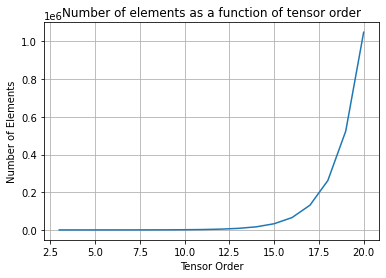

In [7]:
# Plot results
figure = plt.figure()
plt.plot(orders, order_number_of_elements)
plt.title('Number of elements as a function of tensor order')
plt.xlabel('Tensor Order')
plt.ylabel('Number of Elements')
plt.grid(True)
plt.show()

### Solution: Part 3

In [8]:
# Create tensors and collect information
dimension_sizes = range(3, 16)
dim_size_number_of_elements = []

for dimension_size in dimension_sizes:
    dimensionality = np.full(3, dimension_size)
    dim_size_array = np.full(dimensionality, 5)
    dim_size_tensor = Tensor(dim_size_array)
    dim_size_number_of_elements.append(dim_size_tensor.data.size)

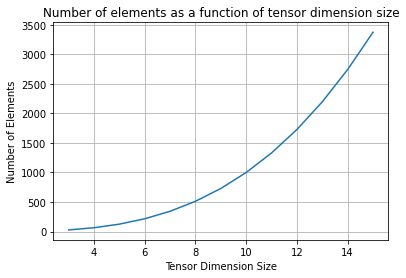

In [9]:
# Plot results
figure = plt.figure()
plt.plot(dimension_sizes, dim_size_number_of_elements)
plt.title('Number of elements as a function of tensor dimension size')
plt.xlabel('Tensor Dimension Size')
plt.ylabel('Number of Elements')
plt.grid(True)
plt.show()

### Solution: Part 4

Through the figures above we clearly observe that the number of elements in the tensor is an exponential function of the tensor order and a polynomial function of the tensor dimension size. Therefore, an increase in the order of the tensor leads to a much larger growth in number of elements than an increase in the dimension size. This has real-world implication as far as computational complexity and physical memory space are concerned.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [12]:
# Create a tensor of order 4
array_4d = np.arange(81).reshape((3, 3, 3, 3))
tensor_4d = Tensor(array_4d)

print(tensor_4d)
tensor_4d.data

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [13]:
# Display slices
for dim0_index in range(tensor_4d.shape[0]):
    print('tensor(:, {}, :, :) slice:'.format(dim0_index))
    print(tensor_4d[:, dim0_index, :, :])

tensor(:, 0, :, :) slice:
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[54 55 56]
  [57 58 59]
  [60 61 62]]]
tensor(:, 1, :, :) slice:
[[[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]

 [[63 64 65]
  [66 67 68]
  [69 70 71]]]
tensor(:, 2, :, :) slice:
[[[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]]

 [[72 73 74]
  [75 76 77]
  [78 79 80]]]


In [14]:
# Display fibers

row_fiber1 = tensor_4d[0, 0, :, 0]
row_fiber2 = tensor_4d[1, 0, :, 0]
row_fiber3 = tensor_4d[2, 0, :, 0]
row_fiber4 = tensor_4d[0, 1, :, 0]
row_fiber5 = tensor_4d[0, 2, :, 0]

print(row_fiber1)
print(row_fiber2)
print(row_fiber3)
print(row_fiber4)
print(row_fiber5)

[0 3 6]
[27 30 33]
[54 57 60]
[ 9 12 15]
[18 21 24]


### Solution: Part 2

In [15]:
# Create a tensor of order 3
doubling_tensor = Tensor(np.ones([4, 2, 5]))
first_frontal_value = 3
frontal_slice_dim = [4, 2]

for dim2_index in range(doubling_tensor.shape[2]):
    current_frontal_value = first_frontal_value * (2 ** (dim2_index))
    doubling_tensor[:, :, dim2_index] = np.full(frontal_slice_dim, current_frontal_value)

print(doubling_tensor)
doubling_tensor.data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 3.,  6., 12., 24., 48.],
        [ 3.,  6., 12., 24., 48.]],

       [[ 3.,  6., 12., 24., 48.],
        [ 3.,  6., 12., 24., 48.]],

       [[ 3.,  6., 12., 24., 48.],
        [ 3.,  6., 12., 24., 48.]],

       [[ 3.,  6., 12., 24., 48.],
        [ 3.,  6., 12., 24., 48.]]])

# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create a tensor
array_4d_unfold = np.arange(360).reshape((4, 5, 3, 6))
tensor_4d_unfold = Tensor(array_4d_unfold)
print(tensor_4d_unfold)

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (4, 5, 3, 6) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [18]:
# Display unfolded version
unfolded_tensor = tensor_4d_unfold.unfold(mode=1)
print(unfolded_tensor.data)
print('Unfolded tensor shape: {}'.format(unfolded_tensor.shape))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287]
 [ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
  288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305]
 [ 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
  306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323]
 [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  144 145 146 147 148 149 150 151 1

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original tensor 
dim0, dim1, dim2 = 2, 4, 10
X_array = np.arange(dim0 * dim1 * dim2).reshape(dim0, dim1, dim2)
X_tensor = Tensor(X_array)

print(X_tensor)

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (2, 4, 10) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [21]:
# Create matrix
matrix_dim0, matrix_dim1 = 5, 4
A_matrix = np.arange(matrix_dim0 * matrix_dim1).reshape(matrix_dim0, matrix_dim1)

print(A_matrix)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [22]:
# Perform mode-n product
Y_tensor = X_tensor.mode_n_product(A_matrix, mode=1, inplace=False)
# Note that in place dictates whether the result of the operation will overwrite the current variable or will be assigned to another variable
print(Y_tensor)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (2, 5, 10) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [23]:
# Validate equivalence between the left and right hand side
left_hand_size = np.matmul(A_matrix.data, X_tensor.unfold(mode=1, inplace=False).data)
right_hand_side = Y_tensor.unfold(mode=1, inplace=False).data
equivalence = np.array_equal(left_hand_size, right_hand_side)
print(equivalence)

True


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create tensor
dim0, dim1, dim2 = 2, 3, 5
X_array = np.arange(dim0 * dim1 * dim2).reshape(dim0, dim1, dim2)
X_tensor = Tensor(X_array)

print(X_tensor)

This tensor is of order 3 and consists of 30 elements.
Sizes and names of its modes are (2, 3, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [25]:
# Create matrices
A_matrix = np.arange(5 * 3).reshape(5, 3)
B_matrix = np.arange(6 * 5).reshape(6, 5)

print(A_matrix)
print(B_matrix)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


In [26]:
# Validate property 1
property_1_left = X_tensor.mode_n_product(A_matrix, mode=1, inplace=False).mode_n_product(B_matrix, mode=2, inplace=False)
property_1_right = X_tensor.mode_n_product(B_matrix, mode=2, inplace=False).mode_n_product(A_matrix, mode=1, inplace=False)

property_1_equivalence = np.array_equal(property_1_left, property_1_right)
print(property_1_equivalence)

True


In [27]:
# Validate property 2
property_2_left = X_tensor.mode_n_product(A_matrix, mode=1, inplace=False).mode_n_product(B_matrix, mode=1, inplace=False)
property_2_right = X_tensor.mode_n_product(np.matmul(B_matrix.data, A_matrix.data), mode=1, inplace=False)

property_2_equivalence = np.array_equal(property_2_left, property_2_right)
print(property_2_equivalence)

True


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [28]:
%%latex

We start from the expression of the mode-$n$ product provided above:
$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}$$

Perform a mode-$n$ multiplication on both sides with the matrix ${\mathbf{B}}$:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{Y}}  \times_n \mathbf{B}$$

Use the expression for $\mathbf{\underline{Y}}$ from the first definition:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{A} \mathbf{X}  \times_n \mathbf{B}$$

Rearrange:
$$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

Q.E.D.

<IPython.core.display.Latex object>